## Comparing the models

A perfect fit would yield a straight line when we plot the predicted values versus the true values. We'll quantify the goodness of fit soon.

### Exercise

Run the fit on all the variables with `X = df`. Did this improve the fit versus the previously tested variable combinations? (Use mean squared error).





In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
data = datasets.load_boston()

In [11]:
import numpy as np
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [13]:
targets = pd.DataFrame(data.target, columns=["MEDV"])

# Take a look at the first few rows
print df.head()
print "----"
print targets.head(3)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
----
   MEDV
0  24.0
1  21.6
2  34.7


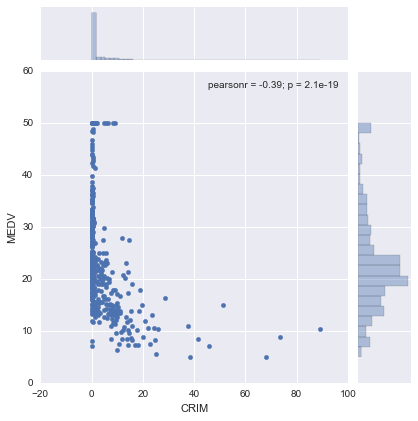

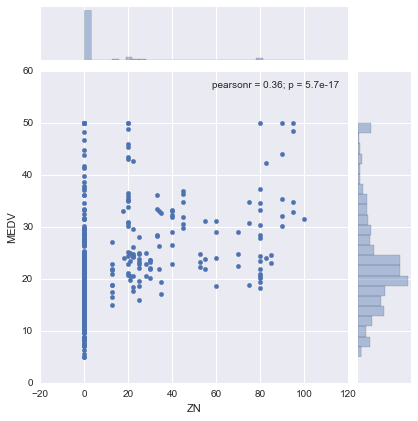

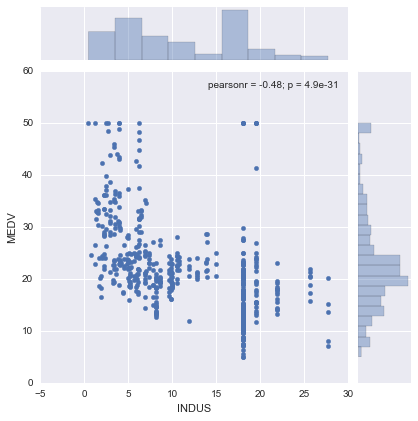

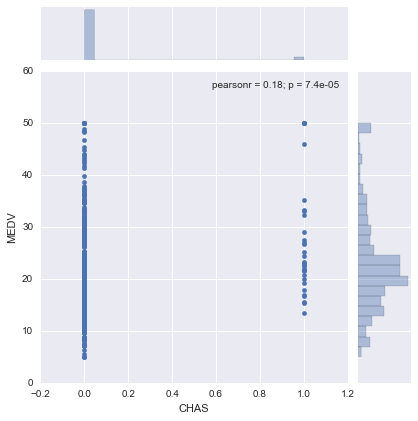

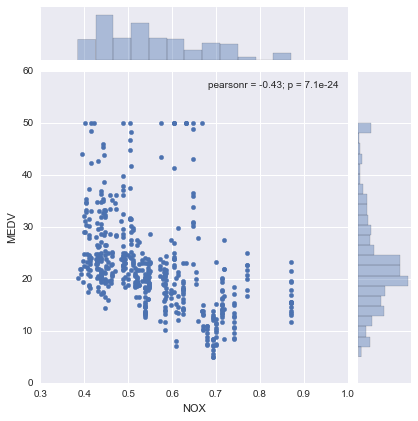

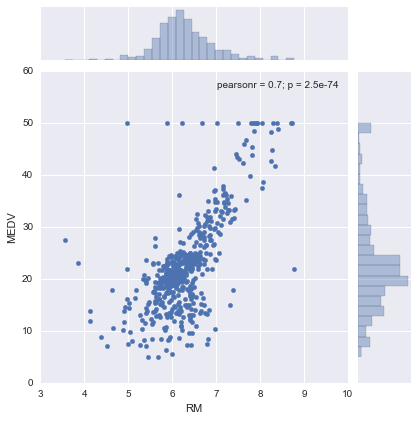

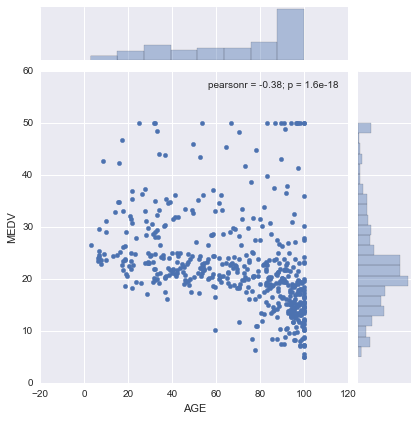

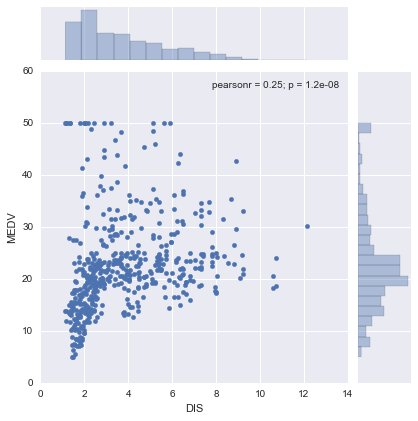

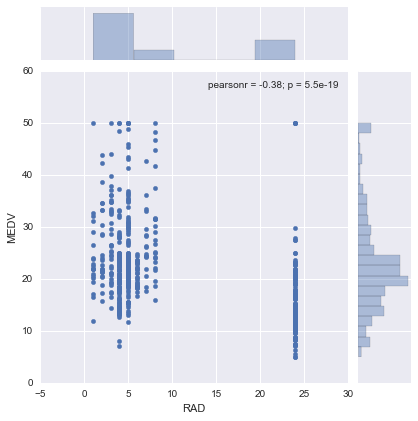

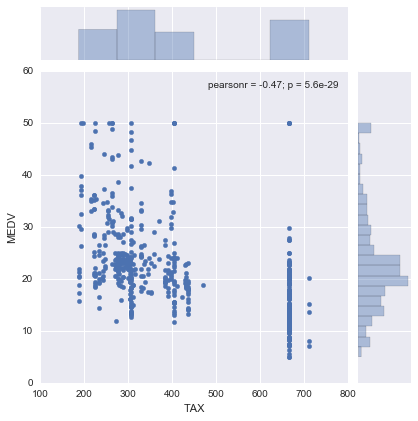

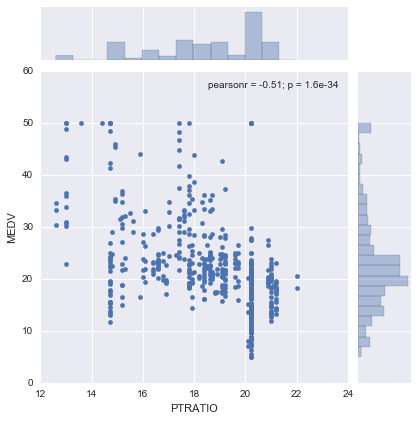

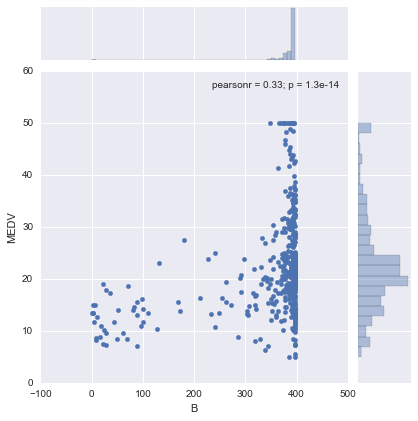

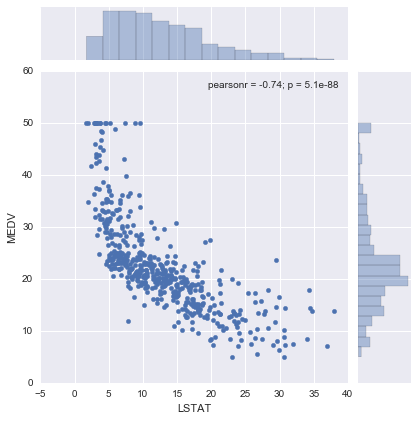

In [7]:
import seaborn as sns
for iv in df.columns.values:
    sns.jointplot(x=df[iv], y=targets["MEDV"])

MSE 21.8977792177


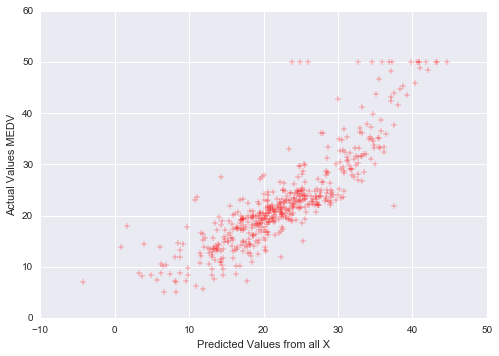

In [14]:
X = df
model = lm.fit(X,y)
predictions = model.predict(X)

print "MSE", mean_squared_error(y, predictions)
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from all X")
plt.ylabel("Actual Values MEDV")
plt.show()


## Guided Practice

Compare this to the analogous fit from scikit-learn above.

### Exercises

Recreate the model above with `statsmodels`:
* a model using LSTAT
* a model using RM and LSTAT
* a model using all the variables

Compare the mean squared errors for each model between the two packages. Do they differ significantly? Why or why not?

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

X = df["RM"]
X = sm.add_constant(X) # Need an intercept, 
#unlike sklearn not added automatically in parameters
y = targets["MEDV"]

model = sm.OLS(y, X).fit()
predictions = model.predict()


In [ ]:
modelL = df["LSTAT"]
X = sm.add_constant(X)


## Independent Practice

Using your preference of `scikit-learn` or `statsmodels`, try to find the best models with:
* only two predictor variables
* only three variables
* only four variables

Evaluate your models using the squared error. Which has the lowest? How do the errors compare to using all the variables?

MSE: 66.2327955018


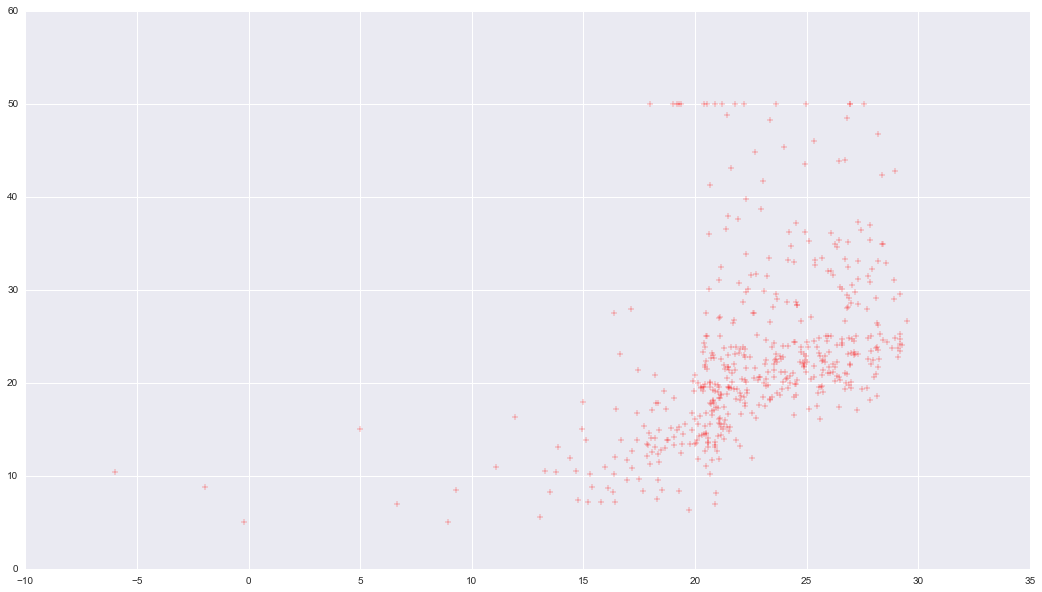

In [18]:
lm = linear_model.LinearRegression()

X = df[["CRIM", "AGE"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = model.predict(X)

print "MSE:", mean_squared_error(y, predictions)
plt.figure(figsize=(18,10))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=1)
plt.show()



MSE: 62.3009771172


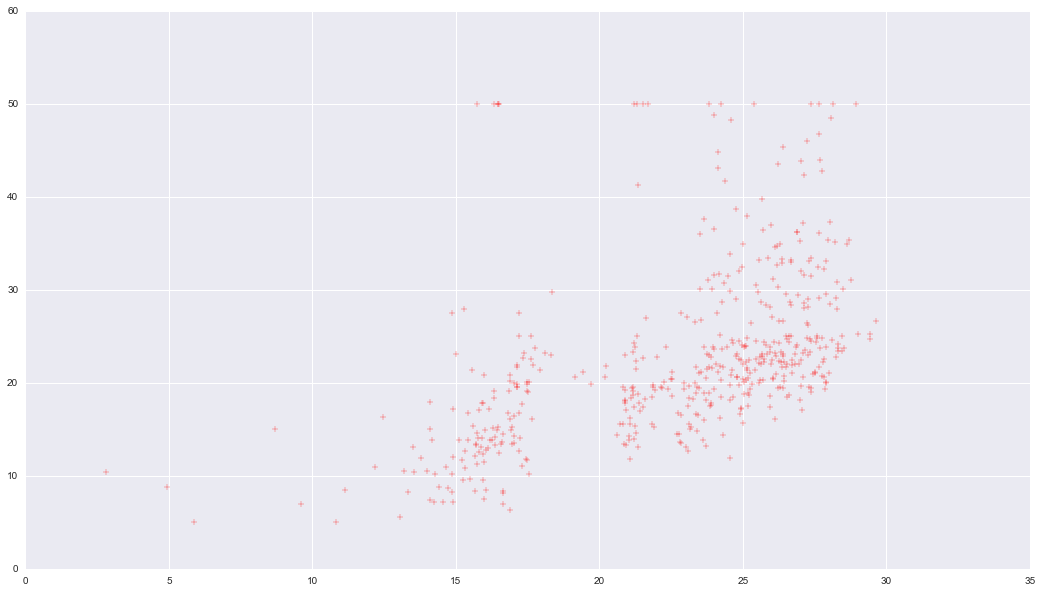

In [19]:
lm = linear_model.LinearRegression()

X = df[["CRIM", "AGE", "TAX"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = model.predict(X)

print "MSE:", mean_squared_error(y, predictions)
plt.figure(figsize=(18,10))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=1)
plt.show()

MSE: 60.0880683806


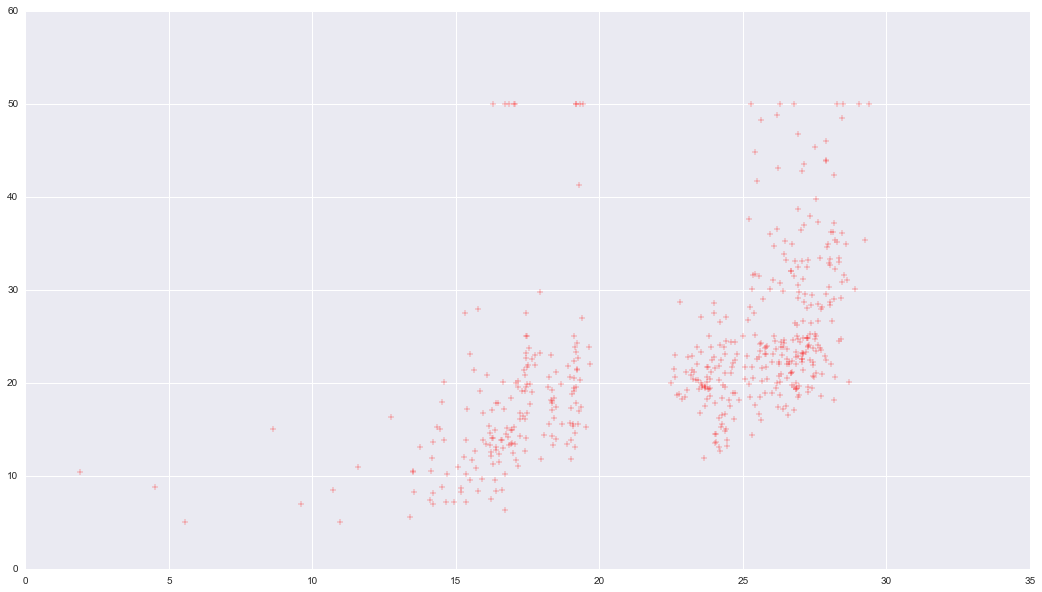

In [20]:
lm = linear_model.LinearRegression()

X = df[["CRIM", "AGE", "TAX", "INDUS"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = model.predict(X)

print "MSE:", mean_squared_error(y, predictions)
plt.figure(figsize=(18,10))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=1)
plt.show()